# NIVEL 1 

Importar librerias - ignorar warnings

In [35]:
import warnings
warnings.filterwarnings("ignore")


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import pandas as pd

Crear conexion - importar BBDD -- crear DF

En el codigo suelo poner comentarios para que sea entendible y tambien porque me ayudan si necesito revisarlo en un futuro.

In [111]:


from sqlalchemy import create_engine

#Automatizamos proceso de importar la BBDD con funcion y bucle

def leer_tablas(usuario, contraseña, host, puerto, base_datos):
    # Creamos el motor de conexión
    engine = create_engine(f"mysql+pymysql://{usuario}:{contraseña}@{host}:{puerto}/{base_datos}")

    # Obtenemos todos los nombres de las tablas de la base de datos
    query_tablas = "SHOW TABLES"
    tablas = pd.read_sql(query_tablas, con=engine)

    # Diccionario para almacenar los DataFrames con los nombres de las tablas como claves
    tablas_dict = {}

    # Abrimos la conexión manualmente
    connection = engine.connect()

    # Recorremos cada tabla y la leemos automáticamente
    for nombre_tabla in tablas.iloc[:, 0]:  # Accede a la columna con los nombres de las tablas
        query = f"SELECT * FROM {nombre_tabla}"
        df = pd.read_sql(query, con=connection)  # Usamos la conexión 
        tablas_dict[nombre_tabla] = df
        globals()[nombre_tabla] = df  # Crea una variable df con el nombre de la tabla
        print(f"Tabla '{nombre_tabla}' cargada correctamente como DataFrame.")

    return tablas_dict, connection  # Devolvemos la conexión también por si la necesitamos todavia antes de decidir de cerrarla manualemte al final

# Llamamos a la función
tablas, connection = leer_tablas("root", "1234", "127.0.0.1", "3308", "sprint_4")

# Mostramos los nombres de las tablas cargadas
print("Tablas disponibles:", tablas.keys())


# Cerramos la conexión 
connection.close()






Tabla 'companies' cargada correctamente como DataFrame.
Tabla 'credit_cards' cargada correctamente como DataFrame.
Tabla 'prod_transactions' cargada correctamente como DataFrame.
Tabla 'products' cargada correctamente como DataFrame.
Tabla 'transactions' cargada correctamente como DataFrame.
Tabla 'users' cargada correctamente como DataFrame.
Tablas disponibles: dict_keys(['companies', 'credit_cards', 'prod_transactions', 'products', 'transactions', 'users'])


Tras haber inspeccionado las tablas, pasamos a la transformacion de algunos datos

# Limpieza - transformación datos

In [112]:


# aqui quitamos el signo $ para poder hacer calculos y lo guardamos en la columna  
products['price']= products['price'].str.replace('$', '')
products['price']= products['price'].astype(float) # aqui lo convertimos a float 





In [113]:
#convertimos la columna a tipo fecha 
users['birth_date'] = pd.to_datetime(users['birth_date'], errors='coerce')

#hacemos una función para crear una columna edad a la tabla users
def edad_usuario(birth_date):
    hoy =datetime.today().date()
    return hoy.year - birth_date.year

#añadimos la columna calculada (edad) con la funcion #
users['edad'] = users['birth_date'].apply(edad_usuario) # llamamos a la funcion

# Creamos la columna franja de edad en df users 
users["franja_edad"] = pd.cut(users["edad"], bins=[20, 30, 40, 50], labels=["20-30", "30-40", "40-50"], include_lowest=True) # incluye tambien la edad exacta minima del rango (20/30/40)





In [114]:
#creamos columna año, mes y dia en transactions
transactions["ano"] = transactions["timestamp"].dt.year
transactions["mes"] = transactions["timestamp"].dt.month_name()
transactions["dia"] = transactions["timestamp"].dt.day_name() # aqui generamos el nombre 
transactions["Num_mes"] = transactions["timestamp"].dt.month # aqui el numero
transactions["Num_dia"] = transactions["timestamp"].dt.day


# Estadistica descriptiva de dos variables numericas mas relevantes



A continuación seguimos inspeccionando mas a fondo las 2 variables numericas que mas nos interesan y tambien  empezamos con el ejercicio 1 ya que las vamos a graficar una por una.

Primera : variable price del df productos

Sagunda: variable amount del df transactions

El describe nos mustra que no hay anomalias pero lo vamos a graficar para verlo mas visualmente. el boxplot y el histograma nos mustran que no hay valores atipicos (outliners) 

# Products Price

MEDIDAS  DE DISPERSIÓN 

In [115]:
# RANGO 
rango = products['price'].max() - products['price'].min()
rango

194.53

In [8]:
# VARIANZA
products['price'].var()

3575.4662607676764

In [9]:
# DESVIACIÓN STANDARD
products['price'].std()

59.79520265679912

In [10]:
# MEDIANA
products['price'].median()

96.58000000000001

In [132]:
# Vemos todos los valores estadisticos
products['price'].describe().round(2)

count    100.00
mean     102.01
std       59.80
min        2.12
25%       53.24
50%       96.58
75%      159.00
max      196.65
Name: price, dtype: float64

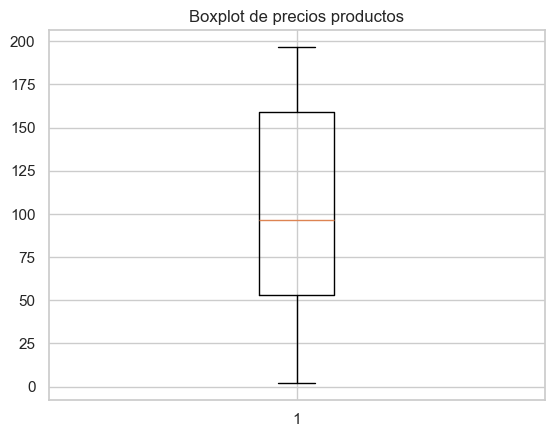

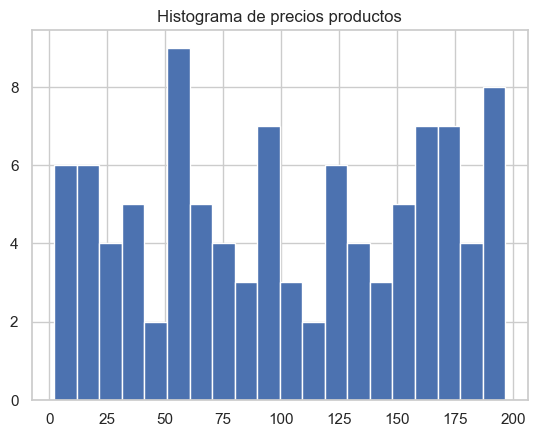

In [41]:
# Ajustamos la escala del eje Y para mostrar números completos ( sin notación cientifica por default)
plt.ticklabel_format(style='plain', axis='y')

# Boxplot con matplotlib
plt.boxplot(products['price'])
plt.title('Boxplot de precios productos')
plt.show()

# Histograma con matplotlib
plt.title('Histograma de precios productos')
plt.hist(products['price'], bins=20)
plt.show()

# Transactions amount

In [89]:
rango2 = transactions['amount'].max() - transactions['amount'].min()
rango2

484.18

In [69]:
transactions['amount'].var()

20774.579764703965

In [73]:
transactions['amount'].std()

144.13389526653322

In [ ]:
transactions['amount'].median()

257.44

In [134]:
transactions['amount'].describe().round(2)

count    587.00
mean     256.74
std      144.13
min       15.05
25%      131.12
50%      257.44
75%      389.90
max      499.23
Name: amount, dtype: float64

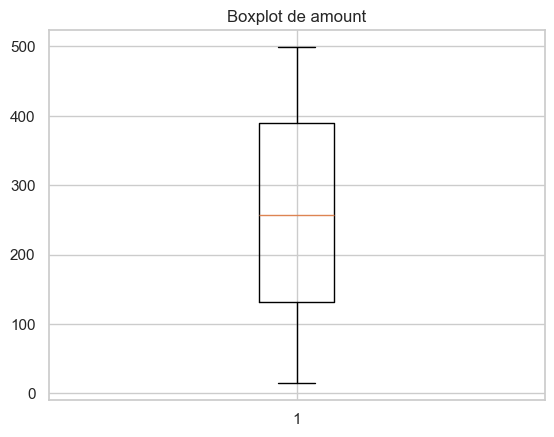

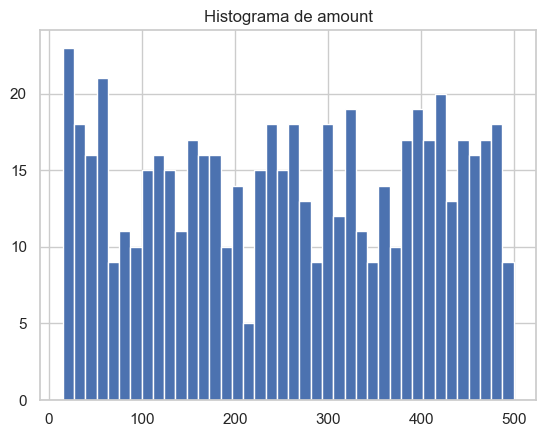

In [116]:
plt.ticklabel_format(style='plain', axis='y')

# Boxplot con matplotlib
plt.boxplot(transactions['amount'])
plt.title('Boxplot de amount')
plt.show()

# Histograma con matplotlib
plt.hist(transactions['amount'], bins=40)  # Puedemos ajustar el número de bins aumentandolo para ver el grafico en mas profundidad con mas rango 
plt.title('Histograma de amount')
plt.show()

en los graficos vemos que la mediana respecta el valor esperado asi como los percentiles 25 y 75

No encontramos valores muy atipicos, esto nos indica que no hay valores mal insertados y que los datos son consistentes.

tanto el boxplot como el calculo de la media y mediana nos indican que la variable precio tiene una distribución asimetrica positiva ( la media es mayor que la mediana) de hecho en el grafico se ve mas cerca al Q1

En caso de que hubiermos encontrado valores atipicos, habriamos tenido que calcular un rango intercuartilico, definir los limites para considerar outlines y eliminarlos/aislarlos 

para tratarlos de manera especial segun necesidad y tipo de analisis.

Por otro lado la desviación standard  ( mas del 50% respecto a la media) nos indica que hay una dispersión de los datos considerable.

En relación el min y el max, especialemte en precio, nos indica que hay un abanico muy amplio de precios de los productos ofrecidos, lo cual nos podria llevar a pensar que hay
una correlación entre las dos variables pero a continuación averiguamos que el analisis no lo confirma, las dos variables no tenien una correlacón linel fuerte.

# CORRELACIÓN ENTRE LAS DOS VARIABLES

EL coeficiente de correlación que utilizaremos en todo el sprint es el de Spearman

coeficiente de correlación:

Si es 1, significa una correlación positiva perfecta. ( aumenta una, aumenta la otra)
Si es -1, indica una correlación negativa perfecta. ( aumenta una, disminuye la otra)
Si es 0, no hay correlación lineal.

Escala Valor Fuerza de la correlación ( tanto negtiva como positva)
0.0 < 0.1	no hay correlación
0.1 < 0.3	poca correlación
0.3 < 0.5	correlación media
0.5 < 0.7	correlación alta
0.7 < 1	correlación muy alta

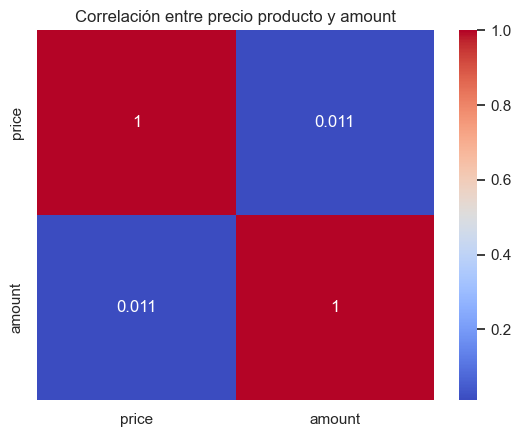

In [117]:
# Creamos un nuevo dataframe solo con variables númericas para poder calcular la correlación


df_combinado = pd.merge(
    pd.merge(
        transactions, prod_transactions, left_on= 'id', right_on= 'transaction_id', how= 'inner', suffixes= ('_trans', '_prodtrans')),
    products, left_on= 'product_id', right_on= 'id', how= 'inner', suffixes= ('_prodtrans', '_prod'))
    


# Creamos el nuevo DataFrame con las columnas que queremos correlacionar
df_nuevo = df_combinado[['price', 'amount']].copy()

# Cálculo de la matriz de correlación
correlation_matrix = df_nuevo.corr()

# Visualización del heatmap con Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre precio producto y amount')
plt.show()

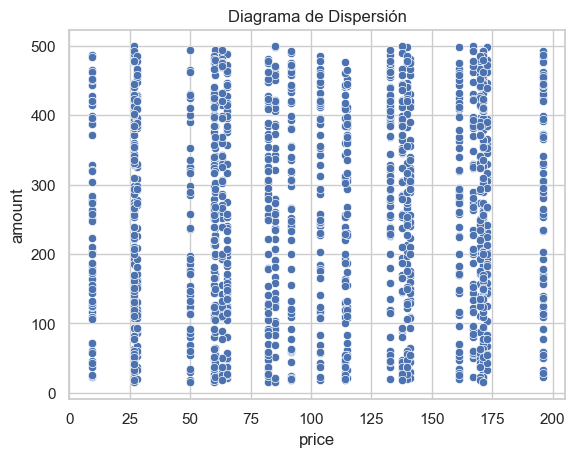

In [118]:
# Diagrama de dispersión con Seaborn para verificar relación lineal 
sns.scatterplot(x='price', y='amount', data=df_nuevo)
plt.title('Diagrama de Dispersión')
plt.show()

- Exercici 1
Una variable numèrica.

<function matplotlib.pyplot.show(close=None, block=None)>

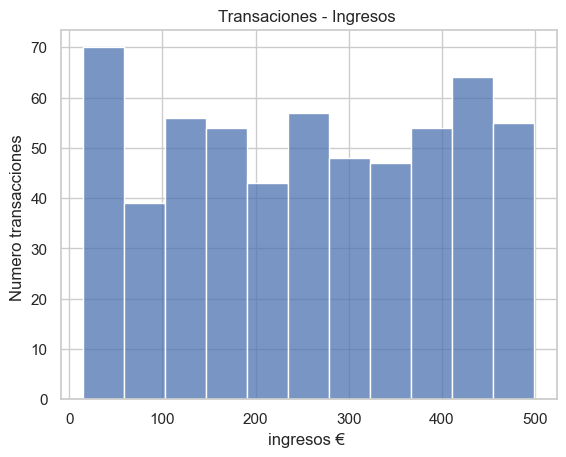

In [43]:
#representamos el rango de transacciones según ingresos con seaborn
sns.set_theme(style="whitegrid") # lineas de rejillas 
sns.histplot(x="amount",data=transactions)
plt.xlabel("ingresos € ")
plt.ylabel("Numero transacciones ")
plt.title("Transaciones - Ingresos ")
plt.show

- Exercici 2
Dues variables numèriques.

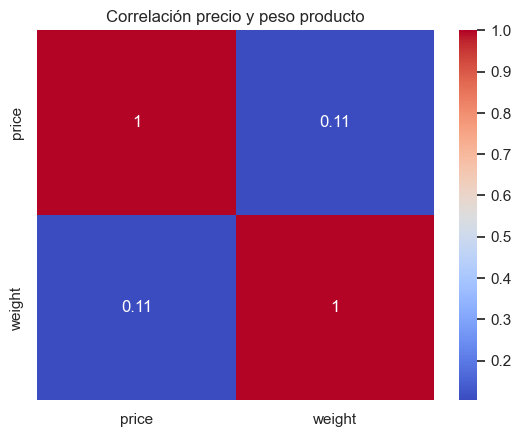

In [119]:
# Correlación precio y peso producto


df_nuevo1 = products[['price', 'weight']].copy()

# Cálculo de la matriz de correlación
correlation_matrix = df_nuevo1.corr()

# Visualización del heatmap con Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación precio y peso producto')
plt.show()






- Exercici 3
Una variable categòrica.

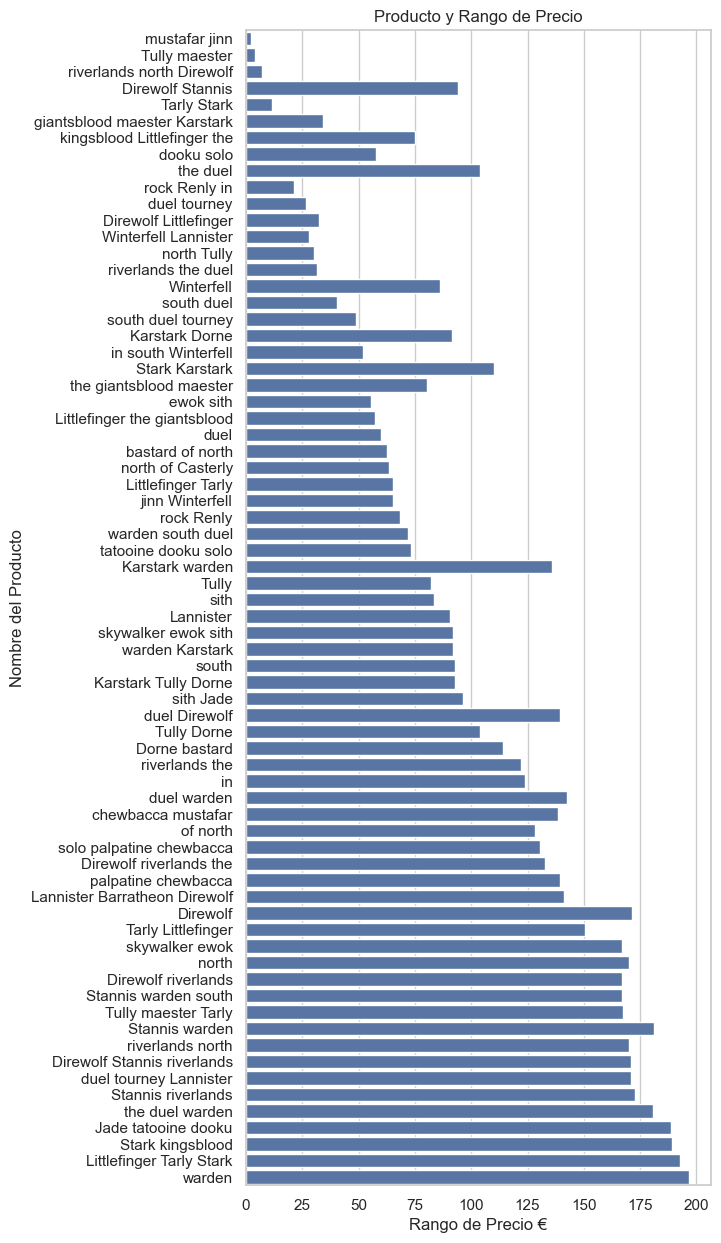

In [126]:
sns.set_color_codes("pastel")

# Ordenamos el DataFrame por price
products_ordenado = products.sort_values('price', ascending=True)

# Hacemos subplot para ajustar el tamaño
f, ax = plt.subplots(figsize=(6, 15))


''' ci= false quita la lines negra en las barras
orint h ponemos barras hotizontal'''

# Graficamos con el df ordenado
sns.barplot(y="product_name", x="price", data=products_ordenado, orient='h', ci=False)

plt.title("Producto y Rango de Precio")
plt.xlabel("Rango de Precio €")
plt.ylabel("Nombre del Producto")

plt.show()


- Exercici 4
Una variable categòrica i una numèrica.

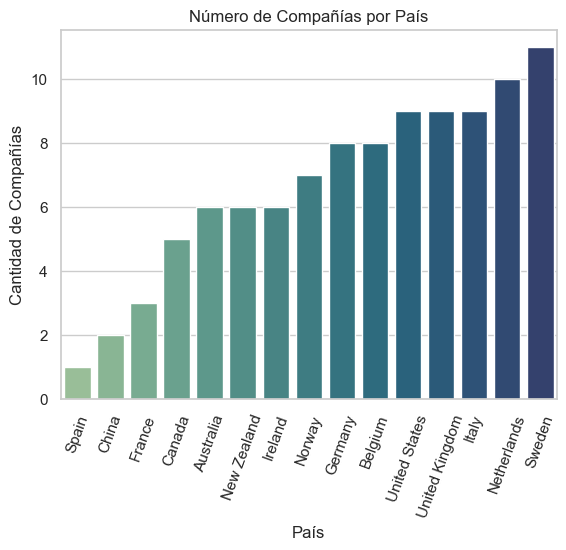

In [130]:
'''Seaborn se usa para  la visualización principal ( el gráfico de barras).
Matplotlib se usa para personalizar el gráfico de Seaborn ( con plt.title(), plt.xlabel() etc).'''

plt.tight_layout()  # Ajustamos layout

comp_por_pais = sns.countplot(
    data=companies, 
    x="country",
    order=companies['country'].value_counts(ascending=True).index, 
    palette="crest")

''' Modificamos las etiquetas y visualización con matplot
 Rota las etiquetas del eje X 70 grados para evitar que se superpongan'''
plt.xticks(rotation=70) 
plt.title("Número de Compañías por País")
plt.xlabel("País")
plt.ylabel("Cantidad de Compañías")

plt.show()


- Exercici 5
Dues variables categòriques.

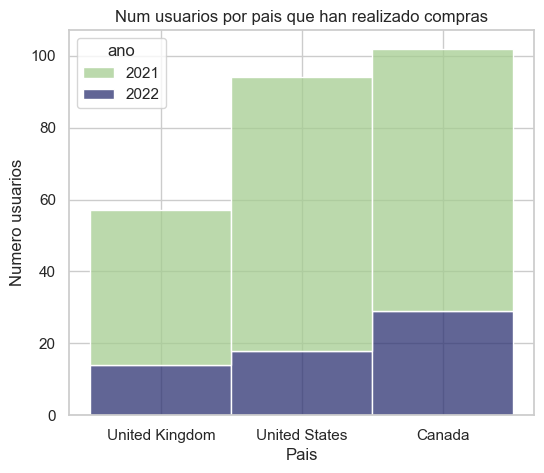

In [143]:
#preparamos dataset para graficar numero de usuarios que han efectuado compras por pais y año
Trans_user = pd.merge(transactions,users, left_on = 'user_id', right_on = 'id', how = 'inner' 
).loc[lambda df: (
    df['declined'] == 0)][['user_id', 'ano','country']]


Trans_user= Trans_user.drop_duplicates() # eliminamos duplicados 

#medidas plantilla grafico
f, ax = plt.subplots(figsize=(6, 5)) 

#ordena de menor a mayor segun al valor de cada categoria (country)
order = Trans_user['country'].value_counts(ascending = True).index 
#convierte la columna country en categorical, luego las categorias se ordenan segun el orden establecido en orden ( el paso previo)
Trans_user['country'] = pd.Categorical(Trans_user['country'], categories=order, ordered=True) 

#Graficamos con histplot y personalizamos 
sns.histplot(data=Trans_user, x="country", hue="ano", multiple="stack", palette ="crest")
plt.title('Num usuarios por pais que han realizado compras')
plt.xlabel('Pais')
plt.ylabel('Numero usuarios')


plt.show()

- Exercici 6
Tres variables.

Aqui hemos querido replicar una metrica del sprint_6 y representarla de otra manera en un solo grafico.

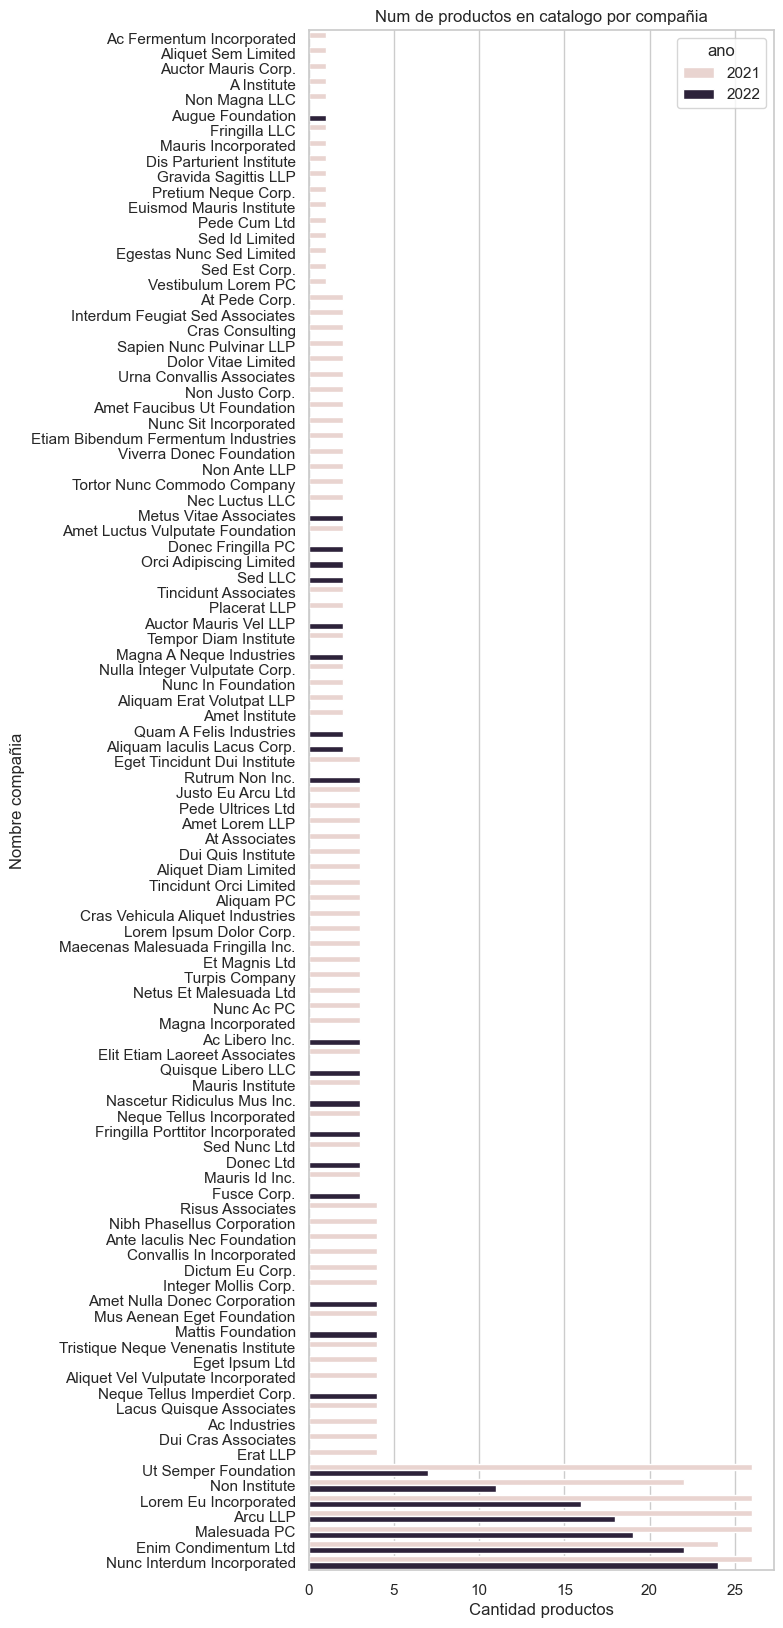

In [110]:

#Preparamos dataframe para visualizar numero producto en catalogo vendidos por compañia 

comp_tra_protra_prod= pd.merge(
    pd.merge(
        pd.merge(
                companies,transactions, left_on= 'company_id', right_on='business_id', how= 'inner'
        ),
        prod_transactions, left_on='id', right_on='transaction_id',how='inner', suffixes=('_transactions', '_prod_trans') 
    ),
    products, left_on='product_id', right_on='id', how='inner'
).loc[lambda df: (
    df['declined'] == 0)
][['company_id','company_name','product_id','declined','ano']]

# agrupamos 
count_prod_por_comp = comp_tra_protra_prod.groupby(['company_id','company_name','product_id','ano']).size().reset_index(name= 'Num_products').sort_values(by='Num_products', ascending= True)  
# contamos los id de productos por compañia con el size 
tot_prod_comp = count_prod_por_comp.groupby(['company_id','company_name','ano']).size().reset_index(name= 'Num_products' ).sort_values(by='Num_products', ascending= True)


# Graficamos        
f, ax = plt.subplots(figsize=(6, 20)) 
sns.barplot(y="company_name", x="Num_products", hue='ano',
            orient= 'h',ci= False, data=tot_prod_comp) 
plt.title("Num de productos en catalogo por compañia")
plt.xlabel("Cantidad productos")
plt.ylabel("Nombre compañia")
plt.show()    


In [140]:
tot_prod_comp.sort_values('Num_products', ascending= False)

,company_id,company_name,ano,Num_products
14,b-2278,Arcu LLP,2021,26
21,b-2302,Nunc Interdum Incorporated,2021,26
39,b-2362,Lorem Eu Incorporated,2021,26
73,b-2494,Malesuada PC,2021,26
34,b-2346,Ut Semper Foundation,2021,26
...,...,...,...,...
52,b-2410,Sed Id Limited,2021,1
103,b-2610,Egestas Nunc Sed Limited,2021,1
102,b-2606,Sed Est Corp.,2021,1
9,b-2258,Vestibulum Lorem PC,2021,1


Replicado con Plotly para que sea dinamico y visualizar de mejor manera las compañias que resaltan en la metrica

In [79]:


# Convertimos la columna 'ano' a string para que sea categórica
tot_prod_comp['ano'] = tot_prod_comp['ano'].astype(str)

# Creamos el gráfico de barras
grafico2 = px.bar(tot_prod_comp, 
                  x="company_name", 
                  y="Num_products", 
                  color="ano",  # Diferenciamos por año
                  title="Num de productos en catálogo por compañía")

# Configuramos el modo de barras en "group" para que estén una al lado de la otra
grafico2.update_layout(
    xaxis_title='Compañía', 
    yaxis_title='Número de productos',
    barmode="group")

grafico2.show()



- Exercici 7
Graficar un Pairplot.

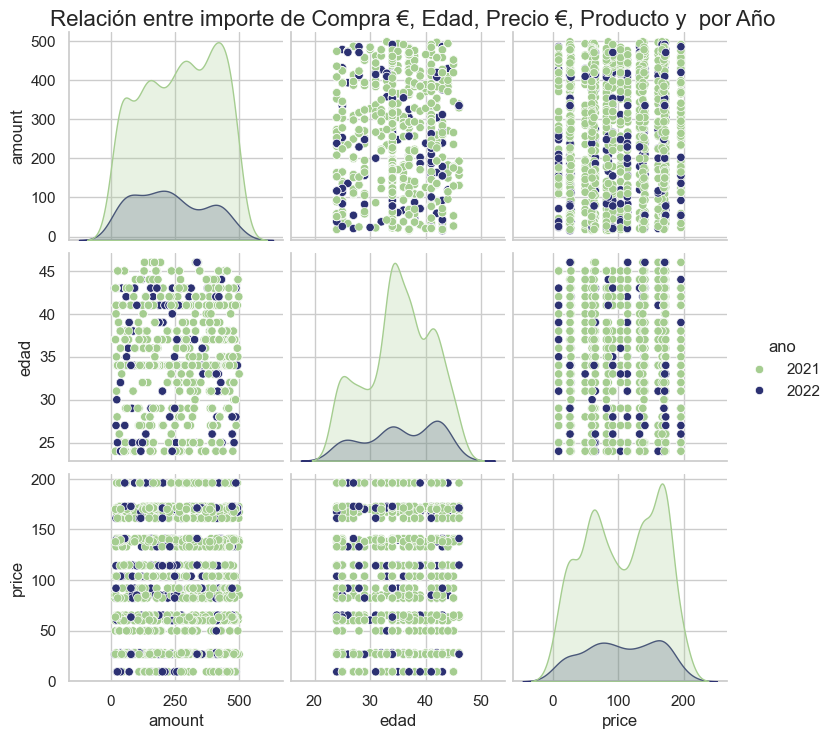

In [76]:
#Preparamos df

join3 = pd.merge(
    pd.merge(
        pd.merge(
            transactions, prod_transactions, left_on='id', right_on='transaction_id', how='inner', suffixes=('_transactions', '_prod_trans')),
        products, left_on='product_id', right_on='id', how='inner'),
    users, left_on='user_id', right_on='id', how='inner', suffixes=('_trans', '_user')
).loc[lambda df: df['declined'] == 0]


sns.pairplot(join3,  x_vars=["amount", "edad", "price"], y_vars=["amount", "edad", "price"], hue="ano", palette="crest")
plt.suptitle("Relación entre importe de Compra €, Edad, Precio €, Producto y  por Año", fontsize=16)
plt.subplots_adjust(top=0.95)  # Ajustamos tamaño para que no se solape el titulo
plt.show()



In [88]:
# Verificamos el coeficiente de correlación
correlation = join3[["amount", "edad", "price"]].corr().round(2)
print(correlation)


        amount  edad  price
amount    1.00  0.03   0.00
edad      0.03  1.00   0.03
price     0.00  0.03   1.00


No se observa ninguna relación lineal significativa entre el importe de la transacción (amount), la edad del usuario (edad) y el precio del producto (price), según los resultados del coeficiente de correlación.

Analizando el año 2021, que es el año con datos suficientes, el gráfico muestra una distribución multimodal en el importe de compra, con los dos picos más altos en el rango de 450 a 500. En cuanto a la edad, como se observó anteriormente, la franja principal de edad es de 30 a 40 años. Dentro de esta franja, se ve una distribución multimodal, destacando un pico alrededor de los 35 años.

Respecto al precio, se aprecia una distribución principalmente bimodal, con dos picos: uno cercano a los 50-60 y otro más alto cerca de los 200.

# NIVEL 2

Exercici 1
Correlació de totes les variables numèriques.

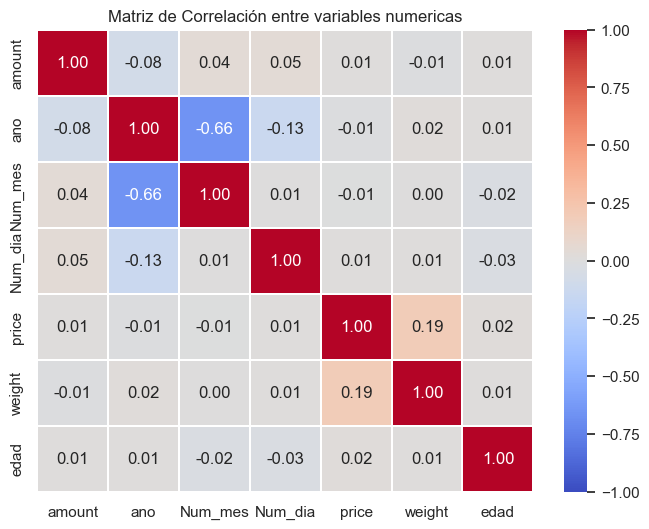

In [104]:
# Preparamaos el DF

join3 = pd.merge(
    pd.merge(
        pd.merge(
            transactions, prod_transactions, left_on='id', right_on='transaction_id', how='inner', suffixes=('_transactions', '_prod_trans')),
        products, left_on='product_id', right_on='id', how='inner'),
    users, left_on='user_id', right_on='id', how='inner', suffixes=('_trans', '_user')
)

# Creamos otro DF con solo las variables numericas
df_var_numericas = join3.select_dtypes(include ='number')

# Eliminamos id_prod_trans y declined del df antes de crear la matriz de correlación para que no nos las mustre ya que no las podemos considerar variables numericas
df_var_numericas = df_var_numericas.drop(columns=['id_prod_trans', 'declined'], errors='ignore')

#Creamos la matriz de correlacion
corr_matrix = df_var_numericas.corr()

# Genereamos un heatmap para mostrar la matriz de correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.1, vmin=-1, vmax=1)
plt.title("Matriz de Correlación entre variables numericas")
plt.show()


Mostramos la matriz de correlación como tabla

In [105]:
corr_matrix = df_var_numericas.corr().round(2)
 
print(corr_matrix)


         amount   ano  Num_mes  Num_dia  price  weight  edad
amount     1.00 -0.08     0.04     0.05   0.01   -0.01  0.01
ano       -0.08  1.00    -0.66    -0.13  -0.01    0.02  0.01
Num_mes    0.04 -0.66     1.00     0.01  -0.01    0.00 -0.02
Num_dia    0.05 -0.13     0.01     1.00   0.01    0.01 -0.03
price      0.01 -0.01    -0.01     0.01   1.00    0.19  0.02
weight    -0.01  0.02     0.00     0.01   0.19    1.00  0.01
edad       0.01  0.01    -0.02    -0.03   0.02    0.01  1.00


Mostramos la matriz pero solo con valores >= a 0.3 ( negativo/positivo) remplazando los demaos valores con NAN

In [106]:
# Definimos el umbral
threshold = 0.3

# Matriz de correlación redondeada
corr_matrix_redondeada = df_var_numericas.corr().round(2)

# Reemplazar valores menores al umbral con NaN filtrando con lambda 
corr_matrix_filtrada = corr_matrix_redondeada.applymap(lambda x: x if abs(x) >= threshold else np.nan)

# Mostrar la matriz filtrada
print(corr_matrix_filtrada)


         amount   ano  Num_mes  Num_dia  price  weight  edad
amount      1.0   NaN      NaN      NaN    NaN     NaN   NaN
ano         NaN  1.00    -0.66      NaN    NaN     NaN   NaN
Num_mes     NaN -0.66     1.00      NaN    NaN     NaN   NaN
Num_dia     NaN   NaN      NaN      1.0    NaN     NaN   NaN
price       NaN   NaN      NaN      NaN    1.0     NaN   NaN
weight      NaN   NaN      NaN      NaN    NaN     1.0   NaN
edad        NaN   NaN      NaN      NaN    NaN     NaN   1.0


Mostramos tabla matriz marcando valores  negativos y positivos con formato conficional según el umbral para resaltar coeficientes que nos interesa resaltar 

In [109]:
# Definimos el umbral
threshold = 0.3

# Función para aplicar formato condicional a coeficientes negativos/positivos
def marcar_valores(val):
    if val == 1.00:  
        return "background-color: blue"  # Diagonal principal marcada en azul
    elif val > threshold:  # Correlaciones positivas mayores que el umbral
        return "background-color: green"  # Positivas en verde
    elif val < -threshold:  # Correlaciones negativas menores que el negativo del umbral
        return "background-color: red"  # Negativas en rojo
    else:
        return ""  # Sin formato cuando no cumple ninguna condición

# Aplicamos formato condicional al DataFrame
estilo_corr = corr_matrix.style.applymap(marcar_valores).format("{:.2f}")

estilo_corr


,amount,ano,Num_mes,Num_dia,price,weight,edad
amount,1.00,-0.08,0.04,0.05,0.01,-0.01,0.01
ano,-0.08,1.00,-0.66,-0.13,-0.01,0.02,0.01
Num_mes,0.04,-0.66,1.00,0.01,-0.01,0.00,-0.02
Num_dia,0.05,-0.13,0.01,1.00,0.01,0.01,-0.03
price,0.01,-0.01,-0.01,0.01,1.00,0.19,0.02
weight,-0.01,0.02,0.00,0.01,0.19,1.00,0.01
edad,0.01,0.01,-0.02,-0.03,0.02,0.01,1.00


En la matriz no se observan correlaciones relevantes, nos marca una correlación de 0.19 entre precio y peso pero no es muy relevante, el coeficiente -0.66 entre año y Num_día se debe a una falta de datos, por cada ño no tenemos todos los meses.

Exercici 2
Implementa un jointplot.

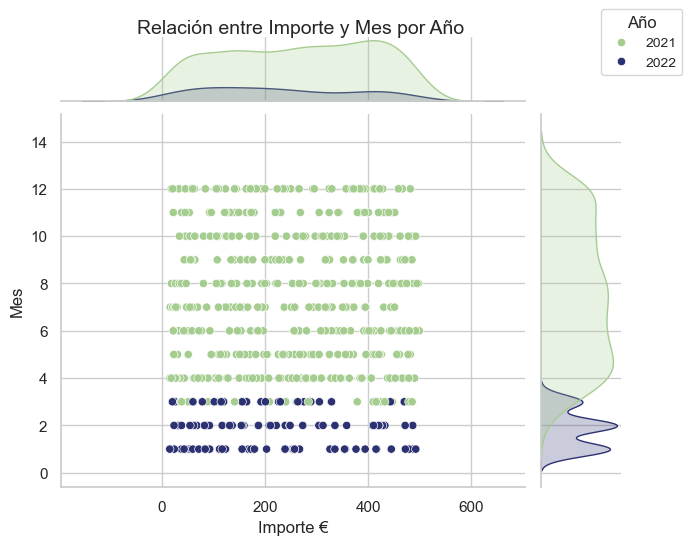

In [48]:
# Creamos jointplot
g = sns.jointplot(x='amount', y='Num_mes', kind='scatter', hue='ano', data=transactions, palette='crest')

# Ajustamos tamaño y etiquetas
g.fig.set_size_inches(8, 6)
g.set_axis_labels("Importe €", "Mes", fontsize=12)
g.fig.subplots_adjust(top=0.95, right=0.9, left=0.2, bottom=0.2)  

# Ajustamos leyenda
g.ax_joint.legend(title="Año", loc='upper left', bbox_to_anchor=(1.15, 1.3), fontsize=10)

# Añadimos título
g.fig.suptitle('Relación entre Importe y Mes por Año', fontsize=14)

plt.show()



In [ ]:
# verificamos coeficiente de correalción
correlation = transactions[['amount', 'Num_mes']].corr().round(2)
print(correlation)


         amount  Num_mes
amount     1.00     0.05
Num_mes    0.05     1.00


En este análisis, observamos el importe de las transacciones por mes y año. Tanto los gráficos marginales como el gráfico de dispersión central muestran una mayor actividad en el año 2021. El rango de importe es similar en todos los meses, aunque con algunos intervalos, lo que indica que durante esos períodos no hubo transacciones. El mes con más transacciones registradas fue abril de 2021.

El coeficiente de correlación entre el importe de la transacción (amount) y el mes (Num_mes) es de 0.05, lo que sugiere que no hay una relación lineal significativa entre el importe de las transacciones y los meses del año. Esto refuerza la idea de que no existe un patrón claro o correlación entre el mes y el importe de las transacciones.

En 2021, no hubo movimiento en el primer trimestre; sin embargo, en 2022, sí se observan transacciones, lo que sugiere un mejor arranque en ese año, a pesar de no contar con datos completos para 2022.

Es importante destacar que, debido a la falta de datos completos para 2022, esta observación no puede confirmarse con certeza. Se requieren más datos para validar si efectivamente hubo un crecimiento o mejora en las transacciones durante el inicio de 2022.



# NIVEL 3

Exercici 1
Implementa un violinplot combinat amb un altre tipus de gràfic.

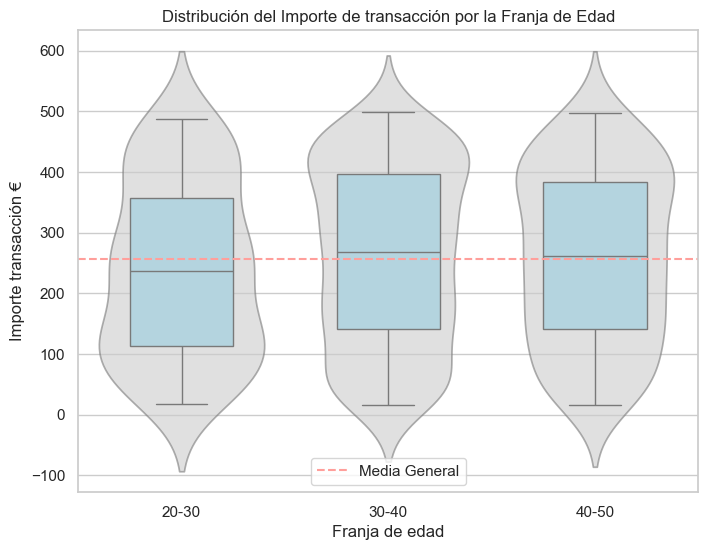

In [ ]:
# Creamos df
trans_user = pd.merge(
    transactions, users, left_on= 'user_id', right_on= 'id', how= 'inner')

plt.figure(figsize=(8, 6))

# Creamos el boxplot para mostrar la mediana y la dispersión de los datos
sns.boxplot(x='franja_edad', y='amount', data=trans_user, color='lightblue', width=0.5, showfliers=False, zorder=2)

# Añadimos el violinplot con transparencia para visualizar la distribución de los datos
sns.violinplot(x='franja_edad', y='amount', data=trans_user, inner=None, color=".8", alpha=0.6, zorder=1)

# Línea de promedio general del importe de transacciones con etiqueta
promedio_general = trans_user['amount'].mean()
plt.axhline(y=promedio_general, color='r', linestyle='--',  label=f'Media General')

# Añadimos la leyenda
plt.legend()

plt.title('Distribución del Importe de transacción por la Franja de Edad')
plt.xlabel('Franja de edad')
plt.ylabel('Importe transacción €')

plt.show()




In [72]:
trans_user.groupby('franja_edad')['amount'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
franja_edad,,,,,,,,
20-30,112.0,238.48,143.21,17.97,112.80,237.19,356.85,487.64
30-40,308.0,261.77,146.20,15.38,140.81,268.68,395.90,499.23
40-50,167.0,259.70,140.75,15.05,141.14,261.35,384.04,497.84


El gráfico muestra que la distribución de los importes de transacciones es relativamente uniforme entre las franjas de edad, aunque con algunas diferencias notables:

Franja de edad 30-40: La mediana de este grupo es superior a la media general, lo que indica que más del 50% de sus transacciones superan la media general. Además, presenta un valor máximo ligeramente superior en comparación con las demás franjas. Esto sugiere que este grupo tiene un comportamiento de compra más elevado y consistente.

Franja de edad 40-50: La mediana en esta franja está alineada con la media general, lo que indica una distribución de transacciones más equilibrada. Este grupo parece tener un patrón de compra más cercano al promedio general.

Franja de edad 20-30: En este grupo, la mediana es inferior a la media general, lo que implica que la mayoría de las transacciones en este grupo se encuentran por debajo de la media general. Esto podría sugerir un poder adquisitivo más bajo o un comportamiento de compra diferente.

Los boxplots revelan una dispersión bastante significativa en los tres grupos. Dentro del IQR (rango intercuartil), la variabilidad es más pronunciada en la franja de edad 30-40, indicando que los importes de transacción son más diversos en este grupo.

Además, mirando el IQR, y la tabla de descripción, muestra que la distribución de los datos es bastante simétrica en general, lo que sugiere una distribución balanceada de los importes de compra dentro de cada franja de edad, sin ambargo podemos observar una ligerisima asimetria negativa en la franja 30-40, la media es menor que la mediana y está más cerca del Q3.



Exercici 2
Genera un FacetGrid per a visualitzar múltiples aspectes de les dades simultàniament.

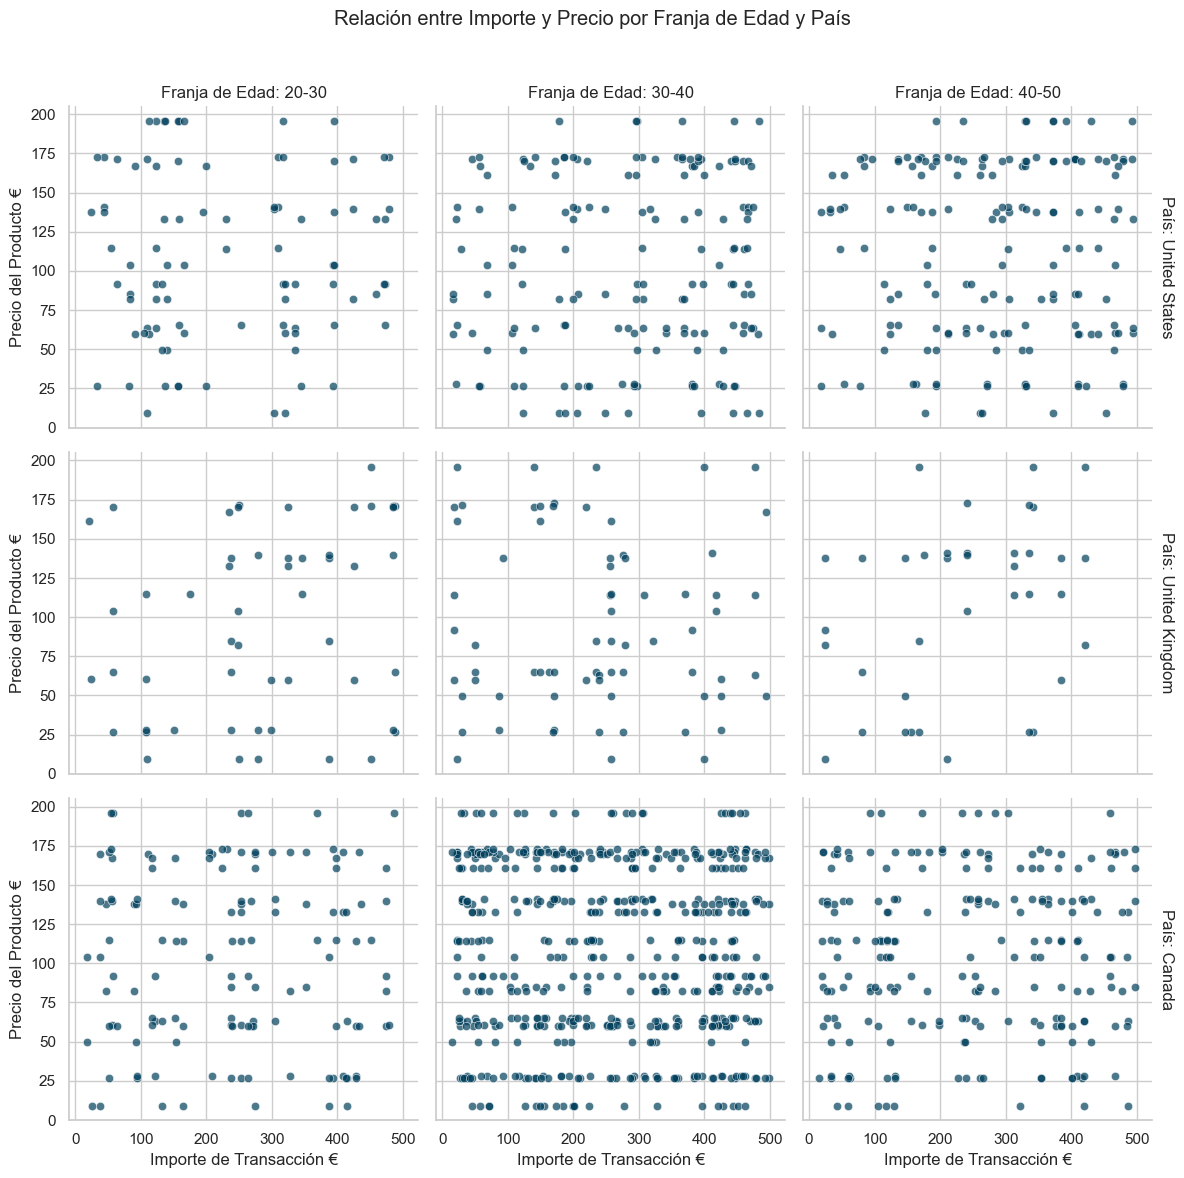

In [100]:
# Preparamos datos
df_completo = pd.merge(
    pd.merge(
        pd.merge(
            prod_transactions, transactions, left_on='transaction_id', right_on='id', how='inner', suffixes=('_prod_trans', '_transactions')),
        products, left_on='product_id', right_on='id', how='inner'),
    users, left_on='user_id', right_on='id', how='inner', suffixes=('_prod', '_user'))

# Creamos un FacetGrid para visualizar el scatter plot entre amount y price
g = sns.FacetGrid(df_completo, col='franja_edad', row='country', margin_titles=True, height=4)

# Graficamos la relación entre 'amount' y 'price'
g.map(sns.scatterplot, 'amount','price',alpha=0.7, color='#003f5c')

# Ajustamos títulos ejes
g.set_axis_labels('Importe de Transacción €','Precio del Producto €')
# col_tamplate es el formato de los títulos que aparecerán en las columnas
# {col_name} y {row_name} se usan para dividir los gráficos según los valores de las columnas (en este caso, franjas de edad y países)
g.set_titles(col_template='Franja de Edad: {col_name}', row_template='País: {row_name}')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Relación entre Importe y Precio por Franja de Edad y País')

plt.show()

In [22]:
# verificamos coeficiente de correalción

correlation = df_completo[['amount', 'price']].corr().round(2)
print(correlation)

        amount  price
amount    1.00   0.01
price     0.01   1.00


El gráfico de dispersión muestra una distribución de puntos dispersos sin una relación clara entre amount y price. No se observan patrones evidentes que sugieran una correlación significativa entre ambas variables. Además, al calcular el coeficiente de correlación, el resultado es 0.01, lo que confirma que no existe una relación lineal entre el importe de la transacción y el precio del producto. Por otro lado, el gráfico revela que en Canadá, dentro de la franja de edad de 30-40 años, se han registrado un mayor número de transacciones y UK es el pais donde se han registrado el menor numero de transacciones en general con una carencia mas evidente en la franja 40-50.